# Web, HTTP, API

## Structure of computer networks (~20min, 19-40)

- Data exchange over a network is layered – from current in the wires to the image in the browser
- To use a network, as a rule, you don't need to understand all the layers well

## Network models: OSI vs TCP/IP

There are two main models:
1. OSI is a reference model ([high-level overview](https://www.youtube.com/watch?v=0y6FtKsg6J4))
2. TCP/IP is more practical

We're going to talk about the TCP/IP model.

![image](https://miro.medium.com/v2/resize:fit:1400/0*bwxmL5N7Q8isupaL.png)

## Low-level networking

![image](https://th.bing.com/th/id/R.349e5587a8a663a749cdd7f6b440f998?rik=3X0JQgww4WZQAQ&riu=http%3a%2f%2f1.bp.blogspot.com%2f_FRSoY4n-eek%2fS21qmcKw5UI%2fAAAAAAAAAf4%2fmYCB2024Yrs%2fw1200-h630-p-k-no-nu%2fTCPIP%2bDiagram.jpg&ehk=YA9EDnHKwCnAjgC1WNpLqmofJt6YkIuPMk59tmD8ATA%3d&risl=&pid=ImgRaw&r=0)

### Ethernet, IP, TCP and everything else

![image](./TCP_IP.svg)

## IPv4 vs IPv6

![image](https://i.ytimg.com/vi/D1avGPpSJHs/maxresdefault.jpg)

## TCP vs UDP
- UDP simply sends messages and doesn't care about delivery reliability or message order
- TCP performs a "handshake" between peers and can guarantee delivery reliability and message order


![image](https://media.geeksforgeeks.org/wp-content/uploads/20230406112559/TCP-3.png)

## Ports
- A 16-bit number that allows you to identify a specific process on a machine with the same IP address

![image](./TCP.png)

## DNS (Domain Name System)

Problem: it's not convenient to remember IP addresses

![image](./basics-of-dns-resolving-with-cache.jpg)

In [3]:
import socket

socket.gethostbyname('google.com')

'142.251.209.142'

### URL: Uniform Resource Locator


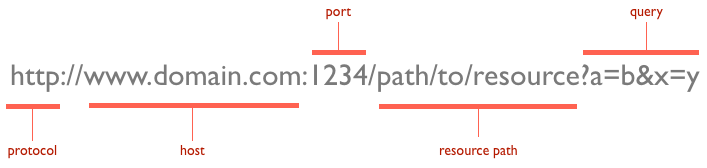

There are many different examples of URL:
```
- ftp://ftp.is.co.za/rfc/rfc1808.txt
- http://www.ietf.org/rfc/rfc2396.txt
- ldap://[2001:db8::7]/c=GB?objectClass?one
- mailto:John.Doe@example.com
- tel:+1-816-555-1212
- telnet://192.0.2.16:80/
```

Let's take a look at the URL: manytask.pycub.education

### HTTP: HyperText Transfer Protocol (~15min, 19:45)

- an application-layer protocol (on top of TCP) on which many applications run

### HTTP-request

![image](./HTTP_Request.png)

Note: usually, you don't use raw HTTP requests. The most low-level way to interact with the web is probably `curl` command.

```bash
curl -X GET http://example.com
```

### HTTP methods

![image](./HTTP_methods.jpg)

### HTTP-response

![image](./HTTP_Response.png)

Let's take a look at the HTTP-response:

```bash
curl -v -X GET http://example.com
```



In [1]:
!curl -v -X GET http://example.com

Note: Unnecessary use of -X or --request, GET is already inferred.
* Host example.com:80 was resolved.
* IPv6: (none)
* IPv4: 23.215.0.136, 23.192.228.84, 23.192.228.80, 23.220.75.245, 23.220.75.232, 23.215.0.138
*   Trying 23.215.0.136:80...
* Connected to example.com (23.215.0.136) port 80
> GET / HTTP/1.1
> Host: example.com
> User-Agent: curl/8.7.1
> Accept: */*
> 
* Request completely sent off
< HTTP/1.1 200 OK
< Content-Type: text/html
< ETag: "84238dfc8092e5d9c0dac8ef93371a07:1736799080.121134"
< Last-Modified: Mon, 13 Jan 2025 20:11:20 GMT
< Cache-Control: max-age=86000
< Date: Fri, 03 Oct 2025 09:36:19 GMT
< Content-Length: 1256
< Connection: keep-alive
< 
<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        m

### HTTP-response

[Mozilla docs: list of HTTP statuses](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status)

![image](./HTTP_statuses.jpeg)

optional

## UDP / TCP in Python

## send via UDP (ipv4)

A **socket** is simply an endpoint for two-way communication between processes over a network.

In [10]:
import socket
# 127.0.0.1 is the localhost (address of the current machine)
addr = '127.0.0.1', 6001  # host, port

sock_one = socket.socket(
    socket.AF_INET,  # Address Family INET (IPv4)
    socket.SOCK_DGRAM  # ≈ "use UDP"
)
sock_one.bind(addr)  # binds the socket to the address; all packets sent to 127.0.0.1:6001 will be received by this socket

with socket.socket(socket.AF_INET, socket.SOCK_DGRAM) as sock_two:
    print(f'Sending messages from {sock_two.getsockname()}')  # 0.0.0.0:0 is ephemeral address which means "not specified"
    sock_two.sendto(b'Hello,', addr)
    print(f'Actual address: {sock_two.getsockname()}')
    sock_two.sendto(b'world!', addr)

with socket.socket(socket.AF_INET, socket.SOCK_DGRAM) as sock_three:
    sock_three.sendto(b'How', addr)
    sock_three.sendto(b'are', addr)
    sock_three.sendto(b'you?', addr)

for _ in range(5):
    data, addr = sock_one.recvfrom(1024)
    print(data, addr)

sock_one.close()

Sending messages from ('0.0.0.0', 0)
Actual address: ('0.0.0.0', 54948)
b'Hello,' ('127.0.0.1', 54948)
b'world!' ('127.0.0.1', 54948)
b'How' ('127.0.0.1', 52407)
b'are' ('127.0.0.1', 52407)
b'you?' ('127.0.0.1', 52407)


## send via UDP (ipv6)

In [ ]:
addr = '::1', 6001, 0, 0

sock_one = socket.socket(
    socket.AF_INET6,  # Address Family INET (IPv6)
    socket.SOCK_DGRAM  # ≈ "use UDP"
)
sock_one.bind(addr)

with socket.socket(socket.AF_INET6, socket.SOCK_DGRAM) as sock_two:
    sock_two.sendto(b'Hello,', addr)
    sock_two.sendto(b'world!', addr)
    
with socket.socket(socket.AF_INET6, socket.SOCK_DGRAM) as sock_three:
    sock_three.sendto(b'How', addr)
    sock_three.sendto(b'are', addr)
    sock_three.sendto(b'you?', addr)

for _ in range(5):
    data, addr = sock_one.recvfrom(1024)
    print(data, addr)

sock_one.close()

b'Hello,' ('::1', 54692, 0, 0)
b'world!' ('::1', 54692, 0, 0)
b'How' ('::1', 62205, 0, 0)
b'are' ('::1', 62205, 0, 0)
b'you?' ('::1', 62205, 0, 0)


## send via TCP (ipv4)
(and a bit of HTTP)

In [12]:
socket.gethostbyname('httpbin.org')

'54.234.120.160'

In [13]:
addr = '54.234.120.160', 80  # httpbin.org

request = b'\r\n'.join([
    b'GET /get HTTP/1.1',  # send the HTTP request over TCP
    b'Host: httpbin.org',
]) + b'\r\n\r\n'

with socket.socket(
    family=socket.AF_INET,  # Adress Family INET
    type=socket.SOCK_STREAM  # ≈ "use TCP"
) as sock:
    sock.connect(addr)
    sock.sendall(request)
    response = sock.recv(1024)

In [17]:
print(response.decode('utf8'))

HTTP/1.1 200 OK
Date: Fri, 03 Oct 2025 09:48:38 GMT
Content-Type: application/json
Content-Length: 200
Connection: keep-alive
Server: gunicorn/19.9.0
Access-Control-Allow-Origin: *
Access-Control-Allow-Credentials: true

{
  "args": {}, 
  "headers": {
    "Host": "httpbin.org", 
    "X-Amzn-Trace-Id": "Root=1-68df9bf4-14aff33c65edf8ca7efb31ef"
  }, 
  "origin": "134.102.106.210", 
  "url": "http://httpbin.org/get"
}



### SSL / TLS

SSL (Secure Sockets Layer) is a protocol for secure communication over a computer network. \
Whenever you see `https://` (with s at the end) in the URL, SSL is used. \
Nowadays, SSL is used everywhere (if you see `http://` in the URL, it's not secure)

<img src="what-is-ssl-handshake.svg" width="50%" height="50%">

### Trying to work without ssl

In [18]:
request = b'\r\n'.join([
    b'GET /get HTTP/1.1',  # send the HTTP request over TCP
    b'Host: httpbin.org',
]) + b'\r\n\r\n'

with socket.create_connection(('httpbin.org', 443), timeout=1) as sock:  # 443 is the HTTPS port
    sock.sendall(request)
    response = sock.recv(1024)
    
print(response.decode('utf8'))

HTTP/1.1 400 Bad Request
Server: awselb/2.0
Date: Fri, 03 Oct 2025 09:53:45 GMT
Content-Type: text/html
Content-Length: 220
Connection: close

<html>
<head><title>400 The plain HTTP request was sent to HTTPS port</title></head>
<body>
<center><h1>400 Bad Request</h1></center>
<center>The plain HTTP request was sent to HTTPS port</center>
</body>
</html>



### ... and with ssl

In [19]:
import ssl

context = ssl.create_default_context()

request = b'\r\n'.join([
    b'GET /get HTTP/1.1',  # send the HTTP request over TCP
    b'Host: httpbin.org',
]) + b'\r\n\r\n'

with socket.create_connection(('httpbin.org', 443)) as sock:
    with context.wrap_socket(sock, server_hostname='httpbin.org') as ssock:
        ssock.sendall(request)
        response = ssock.recv(1024)
    
print(response.decode('utf8'))

HTTP/1.1 200 OK
Date: Fri, 03 Oct 2025 09:53:50 GMT
Content-Type: application/json
Content-Length: 201
Connection: keep-alive
Server: gunicorn/19.9.0
Access-Control-Allow-Origin: *
Access-Control-Allow-Credentials: true

{
  "args": {}, 
  "headers": {
    "Host": "httpbin.org", 
    "X-Amzn-Trace-Id": "Root=1-68df9d2e-2110f9197315bea65f2c6f1a"
  }, 
  "origin": "134.102.106.210", 
  "url": "https://httpbin.org/get"
}



## Requests: HTTP for Humans (20min, 20:15)
A convenient library for working with HTTP in python

In [20]:
import requests

response = requests.get('http://httpbin.org')

response.status_code

200

In [21]:
response.text[:512]

'<!DOCTYPE html>\n<html lang="en">\n\n<head>\n    <meta charset="UTF-8">\n    <title>httpbin.org</title>\n    <link href="https://fonts.googleapis.com/css?family=Open+Sans:400,700|Source+Code+Pro:300,600|Titillium+Web:400,600,700"\n        rel="stylesheet">\n    <link rel="stylesheet" type="text/css" href="/flasgger_static/swagger-ui.css">\n    <link rel="icon" type="image/png" href="/static/favicon.ico" sizes="64x64 32x32 16x16" />\n    <style>\n        html {\n            box-sizing: border-box;\n            overflow: '

optional

## Web scraping

In [22]:
from bs4 import BeautifulSoup

In [23]:
html = requests.get('http://example.com', timeout=1).text

In [24]:
soup = BeautifulSoup(html)

In [25]:
css_element = soup.html.head.style
print(css_element)
css_element.clear()

<style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>


In [26]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Example Domain
  </title>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <style type="text/css">
  </style>
 </head>
 <body>
  <div>
   <h1>
    Example Domain
   </h1>
   <p>
    This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.
   </p>
   <p>
    <a href="https://www.iana.org/domains/example">
     More information...
    </a>
   </p>
  </div>
 </body>
</html>



In [27]:
html = soup.html

In [28]:
html.head.title

<title>Example Domain</title>

In [29]:
html.head.findAll('meta')

/var/folders/b6/nzh1jdk54nvfgrwy6hv3kg8c0000gp/T/ipykernel_28376/2337195660.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  html.head.findAll('meta')


[<meta charset="utf-8"/>,
 <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>]

In [30]:
paragraphs = html.findAll('p')
paragraphs

/var/folders/b6/nzh1jdk54nvfgrwy6hv3kg8c0000gp/T/ipykernel_28376/3627132648.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  paragraphs = html.findAll('p')


[<p>This domain is for use in illustrative examples in documents. You may use this
     domain in literature without prior coordination or asking for permission.</p>,
 <p><a href="https://www.iana.org/domains/example">More information...</a></p>]

In [31]:
links = html.findAll('a')
links

/var/folders/b6/nzh1jdk54nvfgrwy6hv3kg8c0000gp/T/ipykernel_28376/459700068.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  links = html.findAll('a')


[<a href="https://www.iana.org/domains/example">More information...</a>]

In [32]:
for link in links:
    print(link.text, link['href'])

More information... https://www.iana.org/domains/example


In [41]:
#  https://www.google.ru/search?q=test
SEARCH_URL = 'https://www.google.ru/search'
response = requests.get(SEARCH_URL, params={'q': 'wikipedia'}, timeout=1)
# requests can handle HTTP errors itself and raise exceptions when things go wrong
response.raise_for_status()

In [42]:
soup = BeautifulSoup(response.text)  

In [45]:
# print(soup.prettify())

In [36]:
# parsing websites is a thankless job
examples = {}
for div in soup.find_all('div'):
    text = div.text
    if (classes := div.attrs.get('class')) is not None:
        for class_ in classes:
            if not 'Wikipedia — the free encyclopedia' == text:
                continue
            examples[class_] = div.text.strip()

examples

{}

In [37]:
for elem in soup.find_all('div', attrs={'class': 'j039Wc'}):
    descr = elem.find('div', attrs={'class': 'BNeawe'})
    if not descr:
        continue
    print('-', descr.text)

In [38]:
# without specifying /html, you'll get the version of the site that works only with JavaScript
SEARCH_URL = 'https://duckduckgo.com/html'

response = requests.get(
    "https://duckduckgo.com/html", params={'q': 'Python language'},
    headers={'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) '
                           'AppleWebKit/537.36 (KHTML, like Gecko) '
                           'Chrome/77.0.3865.121 '
                           'Safari/537.36'}
)
response.raise_for_status()

In [39]:
soup = BeautifulSoup(response.text)

In [40]:
from IPython.display import display, HTML

for link in soup.find_all('a', attrs={"class": "result__a"}):
    display(HTML(str(link)))

# API: Application Programming Interface


![image](http://blog.restcase.com/content/images/2016/11/api-collaboration.png)

## Public API

In [ ]:
from dotenv import load_dotenv

load_dotenv()


In [ ]:

import os
DICTIONARY_API = 'https://dictionary.yandex.net/api/v1/dicservice.json/lookup'
TEMP_KEY = os.environ.get("YANDEX_DICTIONARY_API_KEY")
# Note: very, very bad practice to store API keys in the code (hard-coded)

In [53]:
params = {'key': TEMP_KEY, 'lang': 'en-ru', 'text': 'hello'}
response = requests.get(DICTIONARY_API, params=params, timeout=1)
response.raise_for_status()
body = response.text

In [54]:
body

'{"head":{},"def":[{"text":"hello","pos":"noun","ts":"həˈləʊ","tr":[{"text":"привет","pos":"noun","gen":"м","fr":10,"syn":[{"text":"добрый день","pos":"noun","fr":5},{"text":"Здравствуй","pos":"noun","gen":"м","fr":1}],"mean":[{"text":"hi"},{"text":"good afternoon"}]},{"text":"приветствие","pos":"noun","gen":"ср","fr":5}]},{"text":"hello","pos":"verb","ts":"həˈləʊ","tr":[{"text":"здравствуйте","pos":"verb","asp":"несов","fr":1,"mean":[{"text":"hi"}]},{"text":"поздороваться","pos":"verb","asp":"сов","fr":5,"mean":[{"text":"greet"}]},{"text":"приветствовать","pos":"verb","asp":"несов","fr":5}]},{"text":"hello","pos":"interjection","ts":"həˈləʊ","tr":[{"text":"АЛЛО","pos":"interjection","fr":10},{"text":"ау","pos":"interjection","fr":1}]},{"text":"hello","pos":"adverb","ts":"həˈləʊ","tr":[{"text":"здорово","pos":"adverb","fr":1,"mean":[{"text":"hey"}]}]}],"nmt_code":200,"code":200}'

In [55]:
response.headers['content-type']

'application/json; charset=utf-8'

# JSON: JavaScript Object Notation

![image](https://www.w3resource.com/w3r_images/json-introduction.png)

In [56]:
import json

In [57]:
definition = json.loads(body)['def']  # or response.json()['def']

In [58]:
definition[:2]

[{'text': 'hello',
  'pos': 'noun',
  'ts': 'həˈləʊ',
  'tr': [{'text': 'привет',
    'pos': 'noun',
    'gen': 'м',
    'fr': 10,
    'syn': [{'text': 'добрый день', 'pos': 'noun', 'fr': 5},
     {'text': 'Здравствуй', 'pos': 'noun', 'gen': 'м', 'fr': 1}],
    'mean': [{'text': 'hi'}, {'text': 'good afternoon'}]},
   {'text': 'приветствие', 'pos': 'noun', 'gen': 'ср', 'fr': 5}]},
 {'text': 'hello',
  'pos': 'verb',
  'ts': 'həˈləʊ',
  'tr': [{'text': 'здравствуйте',
    'pos': 'verb',
    'asp': 'несов',
    'fr': 1,
    'mean': [{'text': 'hi'}]},
   {'text': 'поздороваться',
    'pos': 'verb',
    'asp': 'сов',
    'fr': 5,
    'mean': [{'text': 'greet'}]},
   {'text': 'приветствовать', 'pos': 'verb', 'asp': 'несов', 'fr': 5}]}]

## API with OAuth authorization and a python client

In [61]:
import os
from openai import OpenAI

client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)

response = client.responses.create(
    model="gpt-4o-mini",
    instructions="You are a coding assistant that talks like a pirate.",
    input="How do I check if a Python object is an instance of a class?",
)

print(response.output_text)

Ahoy, matey! To check if a Python object be an instance of a certain class, ye can use the `isinstance()` function, arrr! Here be how ye'd do it:

```python
class Buccaneer:
    pass

jack = Buccaneer()

# Check if 'jack' be an instance of 'Buccaneer'
if isinstance(jack, Buccaneer):
    print("Yarr! Jack be a Buccaneer!")
else:
    print("Nay, Jack be no Buccaneer.")
```

In this fine piece o' code, the `isinstance()` function checks if the `jack` object be an instance of the `Buccaneer` class. If it be true, it be spoutin' that Jack be a Buccaneer! If not, well, he ain't part of the crew. Arrr!


More on OpenAI API: [link](https://github.com/openai/openai-python)

#### Fun fact: Non-public API

All Web-applications have internal APIs for updating data inside themselves. With some effort, you can learn to use these APIs in your code. However, for non-public APIs, no guarantees are made – it can break at any moment.